In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import kagglehub

path = kagglehub.dataset_download("maxbaas/traincsv")



100%|██████████| 8.25M/8.25M [00:00<00:00, 194MB/s]

Extracting files...


In [2]:
df = pd.read_csv(f"{path}/train.csv")
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,26,92,2011-08-26,87235.57,False,61.10,3.796,NaN,NaN,NaN,NaN,NaN,136.213613,7.767,A,152513
1,34,22,2011-03-25,5945.97,False,53.11,3.480,NaN,NaN,NaN,NaN,NaN,128.616064,10.398,A,158114
2,21,28,2010-12-03,1219.89,False,50.43,2.708,NaN,NaN,NaN,NaN,NaN,211.265543,8.163,B,140167
3,8,9,2010-09-17,11972.71,False,75.32,2.582,NaN,NaN,NaN,NaN,NaN,214.878556,6.315,A,155078
4,19,55,2012-05-18,8271.82,False,58.81,4.029,12613.98,NaN,11.5,1705.28,3600.79,138.106581,8.150,A,203819


In [3]:
#check missing value
df.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0
Temperature,0
Fuel_Price,0
MarkDown1,181931
MarkDown2,208219
MarkDown3,190930


In [4]:
# Handle missing value
markdown_cols = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']
df[markdown_cols] = df[markdown_cols].fillna(0)

In [5]:
df['CPI'] = df['CPI'].fillna(df['CPI'].median())
df['Unemployment'] = df['Unemployment'].fillna(df['Unemployment'].median())

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
#Extracting new date feature
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week

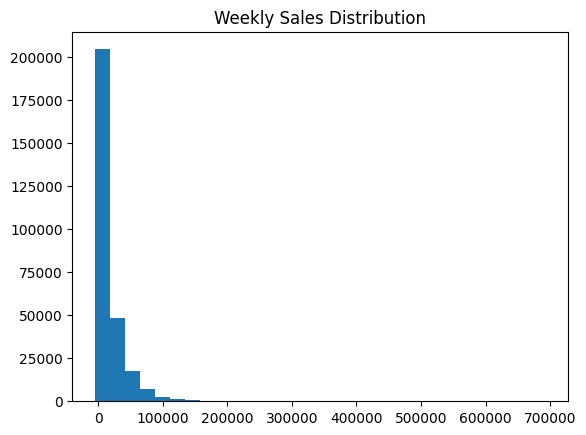

In [10]:
plt.hist(df['Weekly_Sales'], bins=30)
plt.title("Weekly Sales Distribution")
plt.show()

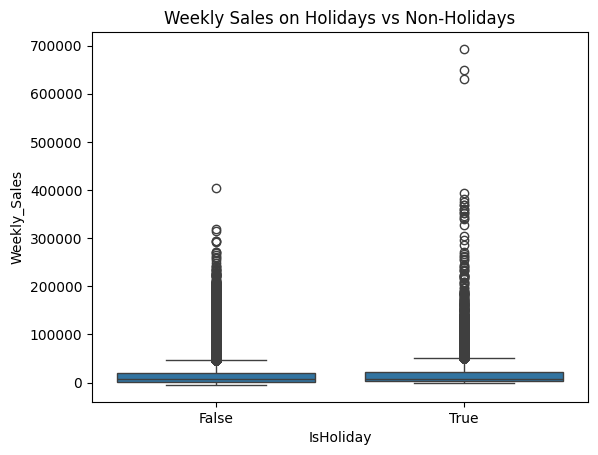

In [11]:
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=df)
plt.title("Weekly Sales on Holidays vs Non-Holidays")
plt.show()

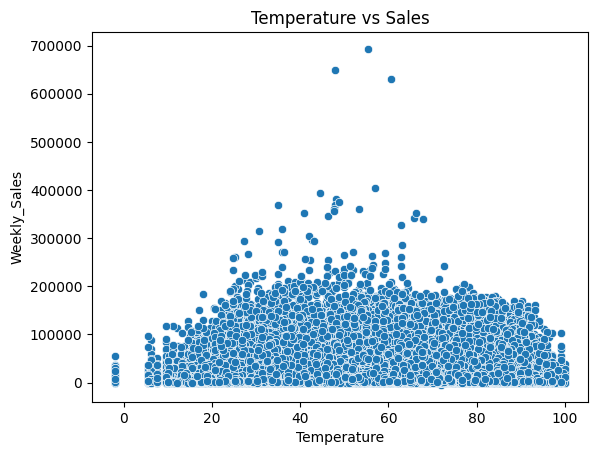

In [12]:
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df)
plt.title("Temperature vs Sales")
plt.show()

In [13]:
df['Log_Weekly_Sales'] = np.log1p(df['Weekly_Sales'])

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [14]:
df['Size_Category'] = pd.cut(df['Size'],
                             bins=[0, 100000, 150000, 250000],
                             labels=['Small', 'Medium', 'Large'])

In [15]:
df.to_csv("cleaned_train.csv", index=False)

In [16]:
df[['Date','Year','Month','Week']].head()

,Date,Year,Month,Week
0,2011-08-26,2011,8,34
1,2011-03-25,2011,3,12
2,2010-12-03,2010,12,48
3,2010-09-17,2010,9,37
4,2012-05-18,2012,5,20


In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
df['Date'] = pd.to_datetime(df['Date'])

# Extract useful time features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df['Day'] = df['Date'].dt.day

# Store numeric columns
numeric_cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price',
                'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5',
                'CPI', 'Unemployment', 'Size']

# Fill missing values with 0
df[numeric_cols] = df[numeric_cols].fillna(0)

# STANDARD SCALING
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# MIN-MAX SCALING
minmax = MinMaxScaler()
df_minmax = df.copy()
df_minmax[numeric_cols] = minmax.fit_transform(df[numeric_cols])

# POLYNOMIAL FEATURES
poly = PolynomialFeatures(degree=2, include_bias=False)

poly_features = poly.fit_transform(df[numeric_cols])
poly_feature_names = poly.get_feature_names_out(numeric_cols)

df_poly = pd.DataFrame(poly_features, columns=poly_feature_names)

# Combine with original dataframe
df_enhanced = pd.concat([df.reset_index(drop=True), df_poly.reset_index(drop=True)], axis=1)

# Final cleaned + feature engineered dataset
print(df_enhanced.head())

   Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0     26    92 2011-08-26      87235.57      False        61.10       3.796   
1     34    22 2011-03-25       5945.97      False        53.11       3.480   
2     21    28 2010-12-03       1219.89      False        50.43       2.708   
3      8     9 2010-09-17      11972.71      False        75.32       2.582   
4     19    55 2012-05-18       8271.82      False        58.81       4.029   

   MarkDown1  MarkDown2  MarkDown3  ...   MarkDown5^2  MarkDown5 CPI  \
0       0.00        0.0        0.0  ...  0.000000e+00       0.000000   
1       0.00        0.0        0.0  ...  0.000000e+00       0.000000   
2       0.00        0.0        0.0  ...  0.000000e+00       0.000000   
3       0.00        0.0        0.0  ...  0.000000e+00       0.000000   
4   12613.98        0.0       11.5  ...  1.296569e+07  497292.794359   

   MarkDown5 Unemployment  MarkDown5 Size         CPI^2  CPI Unemployment  \
0              